# IE582- Homework 3
## Ahmet Buğra Taksuk - 2017402168


- In this homework, we are asked to perform some train-test performance measures using different distance measures and cross-validation methods. We are also asked to perform Logistic Regression models with penalties and also with distance matrix.The data that we worked is UwaveGesture data which is a subject of previous homeworks. It can be reached from https://drive.google.com/drive/u/1/folders/13553neknux7U8why55KM1WrjgkA9IJKm. In the first part, I used sklearn library for K-NN Classifier but also for cross-validation. For the distance measures, I used euclidean and manhattan distance. Then I used 10-fold cross validation to decide on best K value for K-NN classifier and chose the best K based on their test data performances. I used concatanated, applied PCA data. For the second part, we manipulated the classes as if they are binary variables with respect to class 3. I used again sklearn Logistic Regression library which enables us to perform Lasso Regression. We again applied same CV procedure to decide on Lasso Penalty. Lastly, in the last part, we applied same model to the Distance Matrix of the existing data. 

In [4]:
# Necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from scipy.spatial import distance
sns.set(rc={'figure.figsize':(8,6)})

## Task 1 ) On the use of distance information for UwaveGesture Recognition Task

### Part A ) Nearest Neighbor Approach 

In [2]:
# Reading the data 

x_test = pd.read_csv("uWaveGestureLibrary_X_TEST", delim_whitespace=True, header = None )
y_test = pd.read_csv("uWaveGestureLibrary_Y_TEST" ,delim_whitespace=True,  header = None )
z_test = pd.read_csv("uWaveGestureLibrary_Z_TEST", delim_whitespace=True,  header = None)

In [3]:
# Concatanating the series 
#Index is the instances and columns are the time series data 
#Class ID is added as a column 

test_classes = x_test[0]
x_test.pop(0)
y_test.pop(0)
z_test.pop(0)
df_test = pd.concat([x_test,y_test,z_test] , axis = 1,ignore_index=True)
df_test.insert(0,"Class_ID", test_classes)
df_test.head()

,Class_ID,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944
0,5.0,1.557018,1.557018,1.557018,1.557018,1.557018,1.557018,1.557018,1.557018,1.557018,1.557018,1.557018,1.557018,1.557018,1.557018,1.557018,1.557018,1.557018,1.557018,1.557018,1.557018,1.557018,1.557018,1.557018,1.557018,1.557018,1.557018,1.557018,1.557018,1.557018,1.557018,1.557018,1.557018,1.557018,1.557018,1.552968

In [4]:
# PCA applicaiton to the concatanated series

new_data = []
from sklearn.decomposition import PCA
data = df_test.drop(columns = "Class_ID")
pca_new = PCA(n_components = 4)
new_data = pca_new.fit_transform(data)
pca_df_test = pd.DataFrame(new_data, columns = ["PCA1", "PCA2", "PCA3", "PCA4"])
pca_df_test.head()

,PCA1,PCA2,PCA3,PCA4
0,26.640283,-3.584902,-3.144246,-8.897534
1,-19.781964,0.159750,3.092275,0.921995
2,14.344522,3.876354,-12.946701,-1.021919
3,11.211033,6.978736,-17.297487,-9.024163
4,26.346809,6.053684,2.093845,-7.037853


### Euclidean Distance as Similarity Measure

In [5]:
#Deciding best K value for KNN algorithm using k-fold cross validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
# create dataset
X = pca_df_test.values
y = test_classes
scores = []
K_vals = list(range(1,100))
for i in K_vals:
    # prepare the cross-validation procedure
    cv = KFold(n_splits=10)
    # create model
    model = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean')
    # evaluate model
    scores.append(np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))
    # report performance
print("Best K: ", K_vals[np.argmax(scores)],"Score:",  scores[np.argmax(scores)])

Best K:  6 Score: 0.8844229003594716


- According to the simulation run, K values seems to converge after 6-NN. Therefore we can choose K 6.  

### Manhattan Distance as Similarity Measure

In [6]:
#Deciding best K value for KNN algorithm using k-fold cross validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
# create dataset
X = pca_df_test.values
y = test_classes
scores = []
K_vals = list(range(1,100))
for i in K_vals:
    # prepare the cross-validation procedure
    cv = KFold(n_splits=10)
    # create model
    model = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p = 1)
    # evaluate model
    scores.append(np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))
    # report performance
print("Best K: ", K_vals[np.argmax(scores)],"Score:",  scores[np.argmax(scores)])

Best K:  8 Score: 0.8841459049812483


- Similar to previous one, K values seems to converge after 8-NN. Therefore we can choose K as 8.  

### Part B ) Performance of the models on Test Data

### Euclidean Distance as Similarity Measure

In [7]:
import timeit
from sklearn import metrics
from sklearn.metrics import confusion_matrix
K_value = 6
acc_s = []
X_train = pca_df_test.values
y_train = test_classes
# create model
model = KNeighborsClassifier(n_neighbors=K_value, metric = 'euclidean')
start = timeit.default_timer()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
stop = timeit.default_timer()
runtime1 = stop-start
# evaluate model
acc_s.append(["Euclidean", metrics.accuracy_score(y_train,y_pred)])
df_confusion1 = pd.DataFrame(confusion_matrix(y_pred,y_train))


In [8]:
print(f"""
Model : '6-NN with Euclidiean Distance'

Confusion matrix : 
{df_confusion1}


Accuracy : {acc_s[0][1]}

Runtime : {runtime1} seconds


""")


Model : '6-NN with Euclidiean Distance'

Confusion matrix : 
     0    1    2    3    4    5    6    7
0  421    1   11    4    2   51    5    0
1    1  442   13    0    1    1   26    4
2    1    1  406    1   12   13    6    0
3    3    0    0  401    7   33    0    2
4    0    0    4   23  406   27    0    1
5   11    0    4   19    3  314    2    0
6    0    8   15    0    2    6  408    1
7    0    0    1    2    0    4    0  452


Accuracy : 0.9073143495254048

Runtime : 0.12274899999999889 seconds





###  Manhattan Distance as Similarity Measure

In [9]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
K_value = 8
X_train = pca_df_test.values
y_train = test_classes
# create model
model = KNeighborsClassifier(n_neighbors=K_value, metric = 'manhattan')
start = timeit.default_timer()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
stop = timeit.default_timer()
runtime2 = stop-start
# evaluate model
acc_s.append(["Manhattan", metrics.accuracy_score(y_train,y_pred)])
df_confusion2 = pd.DataFrame(confusion_matrix(y_train, y_pred))


In [10]:
print(f"""
Model : '8-NN with Euclidiean Distance'
Confusion matrix : 

{df_confusion2}

Accuracy : {acc_s[1][1]}

Runtime : {runtime2} seconds


""")


Model : '8-NN with Euclidiean Distance'
Confusion matrix : 

     0    1    2    3    4    5    6    7
0  416    1    1    3    0   16    0    0
1    1  438    1    0    0    0   12    0
2   10   12  405    1    3    7   16    0
3    4    0    1  399   27   16    1    2
4    3    0   14    3  408    3    2    0
5   52    1   14   30   27  315    6    4
6    4   29    8    0    0    2  404    0
7    0    4    0    1    1    0    2  452

Accuracy : 0.9036850921273032

Runtime : 0.13696330000000145 seconds





### Part C ) Weighted Distances
- First of all, weighting equally can be reasonable according to the data we are dealing with. For this example, I think it is not that bad to use equally weighted distances. However, changing the weights of distances of each axis can be reasonable in a sense that this data is a gesture data where we are able detect patterns of gestures moving along similar axes. For example, the pattern of 'circle' moves along x and y axes in 2D space but the pattern of upward or downward 'row' is moving along only x or y axes in 2D space. Therefore, weihgting y axes would be beneficial for us to identify these two example gestures. 

## Task 2 ) Linear Models on Alternative Representations of the Data

In [11]:
# Reading the data 

x_train = pd.read_csv("uWaveGestureLibrary_X_TRAIN", delim_whitespace=True, header = None )
y_train = pd.read_csv("uWaveGestureLibrary_Y_TRAIN" ,delim_whitespace=True,  header = None )
z_train = pd.read_csv("uWaveGestureLibrary_Z_TRAIN", delim_whitespace=True,  header = None)


#The classes that are not Class 3 is labeled as 0 

train_classes = x_train[0]
x_train.pop(0)
y_train.pop(0)
z_train.pop(0)
df_train = pd.concat([x_train,y_train,z_train] , axis = 1,ignore_index=True)
df_train.insert(0,"Class_ID", train_classes)
df_train['Class_ID'] = np.where(df_train['Class_ID']==3, 1, 0)
df_train.head()

,Class_ID,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944
0,0,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.240808,-0.177372,-0.068001,0.041370,0.150742,0.260113,0.321361,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.3826

### Task A ) Logistic Regression

In [12]:
#First we need to find a threshold to decide whether the class is 3 or no three based on predicted probabilities.
#For this I am going to calculate the ratio of Class 3 / All classes as suggested in the homework description

ratio = df_train[df_train['Class_ID'] == 1].size / df_train.size
print("Ratio : ", ratio)

Ratio :  0.11830357142857142


In [13]:
from sklearn.linear_model import LogisticRegression
df_test['Class_ID'] = np.where(df_test['Class_ID']==3, 1, 0)
y_train = df_train["Class_ID"].values
X_train = df_train.drop(columns = "Class_ID").values
y_test = df_test["Class_ID"].values
X_test = df_test.drop(columns = "Class_ID").values
model = LogisticRegression(class_weight = {1: 0.11, 0: 0.89}) # instead of interpreting probabilities I am passing class_weights to the predictor 
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy : ", metrics.accuracy_score(y_test,y_pred))
df_confusion1 = pd.DataFrame(confusion_matrix(y_test, y_pred))

Accuracy :  0.9438860971524288


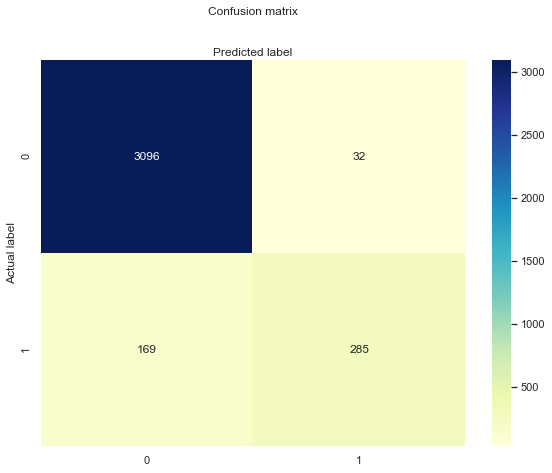

In [14]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

### Task B ) Logistic Regression with penalty

### Deciding best lambda value

In [15]:
#Deciding best lambda value for Penalized Logistic Regression using  10-fold cross validation
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler




y_train = df_train["Class_ID"].values
X_train = df_train.drop(columns = "Class_ID").values

data = MinMaxScaler().fit_transform(X_train)

scores = []
lambda_vals = np.arange(1,20,0.1)
# create model
model = LogisticRegressionCV(Cs = lambda_vals, cv = 10 ,class_weight = {1: 0.11, 0: 0.89}, penalty='l1',solver='liblinear', 
                                 scoring = 'neg_log_loss', max_iter = 1000, random_state = 0)
# evaluate model
model.fit(data,y_train)
model.score(data,y_train)

-0.10805098140153865

In [16]:
model.C_

array([12.8])

### Performance measures

In [17]:
y_test = df_test["Class_ID"].values
X_test = df_test.drop(columns = "Class_ID").values
X_test =  MinMaxScaler().fit_transform(X_test)
# instead of interpreting probabilities I am passing class_weights to the predictor 
y_pred = model.predict(X_test)
print("Accuracy : ", metrics.accuracy_score(y_test,y_pred))

Accuracy :  0.9187604690117253


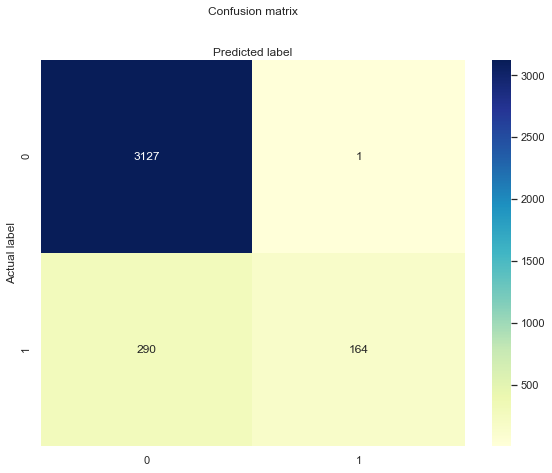

In [18]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [19]:
model.coef_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -9.34049283e-04,
         0.00000000e+00,  0.00000000e+00, -4.87909171e-03,
         0.00000000e+00, -3.16325371e-02, -3.43521252e-02,
        -1.02653599e-02, -4.11092142e-01, -6.14893232e-02,
        -8.34608132e-03,  0.00000000e+00,  0.00000000e+00,
        -1.96206297e-03, -4.40570207e-01, -1.79666316e-01,
        -3.07562198e-01, -4.56257891e-01, -7.02501607e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.93748628e-01, -9.15806286e-01, -1.22223772e+00,
        -1.50376680e+00, -1.03223500e+00, -8.59267660e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

- The array of coefficients is shown above. The first half of the coefficients for each axis is 0, indicating that the first half is not as relevant when categorizing. This makes sense since distance is the sum of velocity over time, and as time passes, distance becomes increasingly particular to each movement.

### Task C ) Logistic Regression with Distance Matrix

In [5]:
# Reading the data 

x_train = pd.read_csv("uWaveGestureLibrary_X_TRAIN", delim_whitespace=True, header = None )
y_train = pd.read_csv("uWaveGestureLibrary_Y_TRAIN" ,delim_whitespace=True,  header = None )
z_train = pd.read_csv("uWaveGestureLibrary_Z_TRAIN", delim_whitespace=True,  header = None)


#The classes that are not Class 3 is labeled as 0 

train_classes = x_train[0]
x_train.pop(0)
y_train.pop(0)
z_train.pop(0)
train_classes = np.where(train_classes==3, 1, 0)


# Reading the data 

x_test = pd.read_csv("uWaveGestureLibrary_X_TEST", delim_whitespace=True, header = None )
y_test = pd.read_csv("uWaveGestureLibrary_Y_TEST" ,delim_whitespace=True,  header = None )
z_test = pd.read_csv("uWaveGestureLibrary_Z_TEST", delim_whitespace=True,  header = None)

test_classes = x_test[0]
x_test.pop(0)
y_test.pop(0)
z_test.pop(0)
test_classes = np.where(test_classes==3, 1, 0)

In [6]:
print(x_train.shape)
print(x_test.shape)

(896, 315)
(3582, 315)


In [7]:
x_train.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315
0,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.240808,-0.177372,-0.068001,0.041370,0.150742,0.260113,0.321361,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.407764,0.432920,0.487605,0.542291,0.596976,0.651662,0.688848,0.726034,0.726034,0.726034,0.726034,0.726034,0.726034,0.726034,0.726034,0.726034,0.726034,0.726034,0.726034,0.726034,0.726034,0.726034,0.726034,0.726034,0.726034,0.726034,0.676817,0.627600,0.572915,0.518229,0.463543,0.408858,0.354172,0.299486,0.244801,0.190115,0.135429,0.080743,0.026058,-0.028628,-0.083313,-0.137999,-0.192685,-0.247370,-0.275807,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.341429,-0.378616,-0.487987,-0.597358,-0.706730,-0.816101,-0.914535,-1.012969,-1.067655,-1.122341,-1.177026,-1.231712,-1.292960,-1.354208,-1.518265,-1.682322,-1.846379,-2.010436,-2.174492,-2.338550,-2.452296,-2.566042,-2.675413,-2.784784,-2.894156,-3.003527,-2.942279,-2.881031,-2.771660,-2.662288,-2.552917,-2.443546,-2.264177,-2.084808,-1.866065,-1.647323,-1.428580,-1.209838,-0.991095,-0.772353,-0.553610,-0.334867,-0.116125,0.102618,0.281987,0.461356,0.570727,0.680099,0.789470,0.898841,1.008213,1.117584,1.226955,1.336326,1.445698,1.555069,1.655690,1.756312,1.756312,1.756312,1.756312,1.756312,1.756312,1.756312,1.756312,1.756312,1.756312,1.756312,1.756312,1.756312,1.668815,1.581318,1.471947,1.362575,1.253204,1.143833,1.034462,0.925091,0.815719,0.706348,0.596977,0.487605,0.435107,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.382609,0.395733,0.408858,0.463543,0.518229,0.572915,0.627600,0.676817,0.726034,0.726034,0.726034,0.726034,0.726034,0.726034,0.726034,0.778533,0.831031,0.885717,0.940402,0.995088,1.049774,1.059617,1.069461,1.069461,1.069461,1.069461,1.069461,1.069461,1.069461,1.069461,1.069461,1.069461,1.069461,1.010400,0.951340,0.841968,0.732597,0.623226,0.513854,0.426357,0.338860,0.284174,0.229489,0.174803,0.120117,0.051213,-0.017691,-0.127062,-0.236433,-0.345804,-0.455175,-0.557984,-0.660793,-0.715479,-0.770165,-0.824851,-0.879536,-0.934222,-0.988908,-0.990001,-0.991095,-0.991095,-0.991095,-0.991095,-0.991095,-0.991095,-0.991095,-0.991095,-0.991095,-0.991095,-0.991095,-0.991095,-0.991095,-0.991095,-0.991095,-0.991095,-0.991095,-0.991095,-0.991095,-0.991095,-0.991095,-0.991095,-0.991095,-0.991095,-0.991095,-0.991095,-0.991095,-0.991095,-0.991095,-0.975783,-0.9604

In [8]:
x_test.shape

(3582, 315)

In [34]:
from sklearn.metrics.pairwise import euclidean_distances
dist_train = euclidean_distances(x_train, x_train) + euclidean_distances(y_train, y_train) + euclidean_distances(z_train, z_train)
dist_test = euclidean_distances(x_test, x_train) + euclidean_distances(y_test, y_train) + euclidean_distances(z_test, z_train)

In [35]:
dist_train.shape

(896, 896)

In [36]:
dist_test.shape

(3582, 896)

### Deciding best lambda value

In [38]:
y_train = train_classes
X_train = dist_train


scores = []
lambda_vals = np.arange(1,10,0.5)
# create model
model = LogisticRegressionCV(Cs = lambda_vals, cv = 10 ,class_weight = {1: 0.11, 0: 0.89}, penalty='l1',solver='liblinear', 
                                 scoring = 'neg_log_loss', max_iter = 1000, random_state = 0)
# evaluate model
model.fit(X_train,y_train)
model.score(X_train,y_train)

-0.004899891932535843

In [39]:
model.C_

array([9.5])

### Performance measures

In [40]:
y_test = test_classes
X_test = dist_test

# instead of interpreting probabilities I am passing class_weights to the predictor 
y_pred = model.predict(X_test)
print("Accuracy : ", metrics.accuracy_score(y_test,y_pred))

Accuracy :  0.9743160245672808


In [41]:
model.coef_

array([[ 0.00000000e+00,  2.19185182e-03, -1.33704248e-06,
        -5.70506240e-02, -3.98667480e-03,  1.43089067e-04,
         0.00000000e+00, -9.08572579e-03,  1.56593625e-02,
         5.50558418e-02,  1.02435831e-03,  2.17108108e-02,
         8.78796317e-03, -4.65275145e-03, -8.51260686e-03,
         9.98354592e-03,  0.00000000e+00, -1.14886017e-02,
         1.93075438e-02, -4.59881996e-03, -2.58832875e-03,
         0.00000000e+00,  6.94482308e-03,  2.27503203e-03,
        -1.75920722e-03,  6.79552272e-03, -2.43099519e-02,
         1.23355264e-02,  4.09568040e-03,  1.03565672e-04,
         0.00000000e+00,  0.00000000e+00, -9.07569450e-04,
        -1.02746350e-02,  3.13896098e-02,  9.38062940e-03,
        -5.04890355e-03, -3.14131606e-03,  1.94448445e-03,
         7.65860291e-03,  2.50315070e-02,  3.61534954e-03,
         1.89959318e-04,  0.00000000e+00, -3.96152549e-03,
        -3.93403968e-03,  1.28785869e-05,  1.61605624e-05,
         1.16898589e-02,  1.94304791e-02,  5.65745436e-0

- We may deduce from this array that practically every observation in the training set is significant in classification based on distance information, with the exception of a handful with 0 coefficients. We may claim that these 0's aren't as significant as the other data, and that they may be outliers in terms of class-3 categorization. It's worth noting that the accuracy score has increased.

### Task D ) Comparison of Models  

In [42]:
print("""

-6-NN with Euclidean Distance 
* Accuracy : 0.9073143495254048

-8-NN with Manhattan Distance 
* Accuracy : 0.9036850921273032

-Logistic Regression 
*Accuracy : 0.9438860971524288

-Lasso Regression
*Accuracy :  0.9187604690117253

-Lasso Regression with Distance Matrix
*Accuracy : 0.9743160245672808

- To compare the results, we can divide the result into two categories which K-NN's with multi-class accuracies and Logistic Regressions 
with binary-class accuracies. 6-NN with Euclidean Distance and 8-NN with Manhattan distance performs very similar in test data. That's may because that
I applied PCA to the dataset in the first part. Since there is only 4 features on columns, distance and K value seems to be not that sensitive to 
our results. 

- For the regression part, Lasso regression with distance matrix has the best score. Cconsidering that the accuracy for lasso regression is lower than 
the logistic regression without distance matrix, we can easliy say that distance matrix definetely contributing to the model. 







""")



-6-NN with Euclidean Distance 
* Accuracy : 0.9073143495254048

-8-NN with Manhattan Distance 
* Accuracy : 0.9036850921273032

-Logistic Regression 
*Accuracy : 0.9438860971524288

-Lasso Regression
*Accuracy :  0.9187604690117253

-Lasso Regression with Distance Matrix
*Accuracy : 0.9743160245672808

- To compare the results, we can divide the result into two categories which K-NN's with multi-class accuracies and Logistic Regressions 
with binary-class accuracies. 6-NN with Euclidean Distance and 8-NN with Manhattan distance performs very similar in test data. That's may because that
I applied PCA to the dataset in the first part. Since there is only 4 features on columns, distance and K value seems to be not that sensitive to 
our results. 

- For the regression part, Lasso regression with distance matrix has the best score. Cconsidering that the accuracy for lasso regression is lower than 
the logistic regression without distance matrix, we can easliy say that distance matrix de